# Investigacion Corta 2
## Hepatitis database
Procedemos a trabajar en los pasos en la forma en que normalmente se lleva a cabo el pre-procesado de los datos, se muestran los pasos y ademas se hace uso del dataset "Hepatitis", el cual se puede obtener en el link de UCI:
http://archive.ics.uci.edu/ml/datasets/Hepatitis

In [6]:
#se importan las librerias necesarias 
import numpy as np
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statistics import mean, median
import sklearn
from sklearn.datasets import load_boston
from scipy import stats
from matplotlib import style
import matplotlib.ticker as ticker
%matplotlib inline

In [106]:
# se importa el archivo CSV que contiene el set de datos "hepatitis"
Hepatitis = pd.read_csv("hepatitis.csv")

In [107]:
#Se muestran las lineas superiores de la tabla de datos
Hepatitis.head()


,Live,30,2,1,2.1,2.2,2.3,2.4,1.1,2.5,...,2.7,2.8,2.9,1.2,85,18,4,?,1.3,150
0,Live,50,1,1,2,1,2,2,1,2,...,2,2,2,0.9,135,42,3.5,?,1,98
1,Live,78,1,0,2,1,2,2,2,2,...,2,2,2,0.7,96,32,4,?,1,98
2,Live,31,1,?,1,2,2,2,2,2,...,2,2,2,0.7,46,52,4,80,1,99
3,Live,34,1,0,2,2,2,2,2,2,...,2,2,2,1,?,200,4,?,1,99
4,Live,34,1,0,2,2,2,2,2,2,...,2,2,2,0.9,95,28,4,75,1,97


In [108]:
# se nombran las columnas con los features respectivos para cada variable del set de datos
column_names = ['Status', 'Age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver_big',
               'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin', 'alk_Phospathe', 'Sgot', 'albumin', 'protime', 'histology', 'datos_Outliers']

In [109]:
Hepatitis = pd.read_csv("hepatitis.csv",names=column_names)


In [36]:
#Se muestran las lineas superiores de la tabla de datos ya con los nombres asignados
Hepatitis.head()

,Status,Age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,...,spiders,ascites,varices,bilirubin,alk_Phospathe,Sgot,albumin,protime,histology,datos_Outliers
0,Live,30,2,1,2,2,2,2,1,2,...,2,2,2,1,85,18,4,?,1,150
1,Live,50,1,1,2,1,2,2,1,2,...,2,2,2,0.9,135,42,3.5,?,1,98
2,Live,78,1,0,2,1,2,2,2,2,...,2,2,2,0.7,96,32,4,?,1,98
3,Live,31,1,?,1,2,2,2,2,2,...,2,2,2,0.7,46,52,4,80,1,99
4,Live,34,1,0,2,2,2,2,2,2,...,2,2,2,1,?,200,4,?,1,99


## se procede a realizar un analisis exploratorio de los datos como ejemplo

In [53]:
#En esta salida vemos las columnas, el total de filas y la cantidad de filas sin nulos. También los tipos de datos
Hepatitis.info()
# Dimensiones del dataset
# ==============================================================================
Hepatitis.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Status           155 non-null    object
 1   Age              155 non-null    int64 
 2   sex              155 non-null    int64 
 3   steroid          155 non-null    object
 4   antivirals       155 non-null    int64 
 5   fatigue          155 non-null    object
 6   malaise          155 non-null    object
 7   anorexia         155 non-null    object
 8   liver_big        155 non-null    object
 9   liver_firm       155 non-null    object
 10  spleen_palpable  155 non-null    object
 11  spiders          155 non-null    object
 12  ascites          155 non-null    object
 13  varices          155 non-null    object
 14  bilirubin        155 non-null    object
 15  alk_Phospathe    155 non-null    object
 16  Sgot             155 non-null    object
 17  albumin          155 non-null    ob

(155, 21)

In [54]:
# Número de datos ausentes por variable
# ==============================================================================
Hepatitis.isna().sum().sort_values()

Status             0
protime            0
albumin            0
Sgot               0
alk_Phospathe      0
bilirubin          0
varices            0
ascites            0
spiders            0
histology          0
spleen_palpable    0
liver_big          0
anorexia           0
malaise            0
fatigue            0
antivirals         0
steroid            0
sex                0
Age                0
liver_firm         0
datos_Outliers     0
dtype: int64

In [38]:
#Pandas filtra las features numéricas y calcula datos estadísticos que pueden ser útiles
#cantidad, media, desvío estándar, valores máximo y mínimo.
Hepatitis.describe()

,Age,sex,antivirals,histology,datos_Outliers
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,41.200000,1.103226,1.845161,1.451613,98.670968
std,12.565878,0.305240,0.362923,0.499266,10.844898
min,7.000000,1.000000,1.000000,1.000000,10.000000
25%,32.000000,1.000000,2.000000,1.000000,98.000000
50%,39.000000,1.000000,2.000000,1.000000,99.000000
75%,50.000000,1.000000,2.000000,2.000000,100.000000
max,78.000000,2.000000,2.000000,2.000000,150.000000


In [45]:
# se reemplazan los valores 2 para defijinir los datos en terminos de 1s y 0s
Hepatitis.replace(to_replace='2', value = 0, inplace = True)


In [46]:
# se reemplazan los valores  para definir los datos en terminos de 1s y 0s
Hepatitis.replace(to_replace='?', value = np.nan, inplace = True)

In [47]:
Hepatitis.head()

,Status,Age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,...,spiders,ascites,varices,bilirubin,alk_Phospathe,Sgot,albumin,protime,histology,datos_Outliers
0,Live,30,2,1,2,0,0,0,1,0,...,0,0,0,1,85,18,4,61.0,1,150
1,Live,50,1,1,2,1,0,0,1,0,...,0,0,0,0.9,135,42,3.5,61.0,1,98
2,Live,78,1,0,2,1,0,0,0,0,...,0,0,0,0.7,96,32,4,61.0,1,98
3,Live,31,1,0.0,1,0,0,0,0,0,...,0,0,0,0.7,46,52,4,80,1,99
4,Live,34,1,0,2,0,0,0,0,0,...,0,0,0,1,85.0,200,4,61.0,1,99


In [48]:
# se reemplazan los valores NAN por la mediana en este caso para que se puedan ajustar los datos.
Hepatitis.fillna(Hepatitis.median(), inplace = True)

In [49]:
Hepatitis.head()

,Status,Age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,...,spiders,ascites,varices,bilirubin,alk_Phospathe,Sgot,albumin,protime,histology,datos_Outliers
0,Live,30,2,1,2,0,0,0,1,0,...,0,0,0,1,85,18,4,61.0,1,150
1,Live,50,1,1,2,1,0,0,1,0,...,0,0,0,0.9,135,42,3.5,61.0,1,98
2,Live,78,1,0,2,1,0,0,0,0,...,0,0,0,0.7,96,32,4,61.0,1,98
3,Live,31,1,0.0,1,0,0,0,0,0,...,0,0,0,0.7,46,52,4,80,1,99
4,Live,34,1,0,2,0,0,0,0,0,...,0,0,0,1,85.0,200,4,61.0,1,99


# Graficacion
### se grafican algunos datos como ejemplo

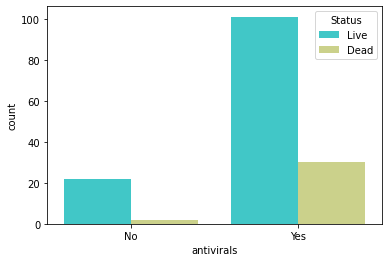

In [596]:
plt.figure()
sns.countplot(x='antivirals', hue='Status', data=Hepatitis, palette='rainbow')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

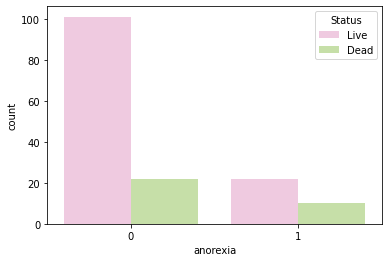

In [597]:
plt.figure()
sns.countplot(x='anorexia', hue='Status', data=Hepatitis, palette='PiYG')
plt.show()

# Analisis de Outliers
### se realizan diferentes formas de indentificacion de Outliers 
Se mofifico el set de datos agregando una columna de datos llamada datos_Outliers para poder demostrarlas diferentes tecnicas para la deteccion de outliers  ( se agregaron 3 valores como outliers)

C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


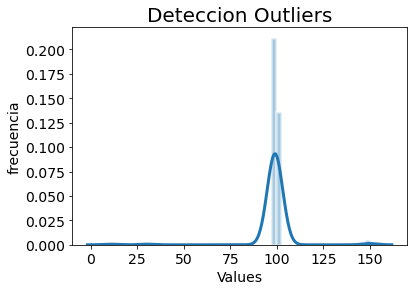

In [50]:
## Funcion para graficar, no se observan outlier de una manera facil
ax = sns. distplot(Hepatitis.datos_Outliers, hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3}) 
plt. xticks(fontsize=14)
plt. yticks(fontsize=14)

# etiquetas y título
plt. xlabel('Values', fontsize=14)
plt. ylabel('frecuencia', fontsize=14)
plt. title('Deteccion Outliers', fontsize=20);

{'whiskers': [<matplotlib.lines.Line2D at 0x22bc4048400>,
 'caps': [<matplotlib.lines.Line2D at 0x22bc4059160>,
 'boxes': [<matplotlib.lines.Line2D at 0x22bc40488e0>],
 'medians': [<matplotlib.lines.Line2D at 0x22bc4059d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x22bc4059430>],
 'means': []}

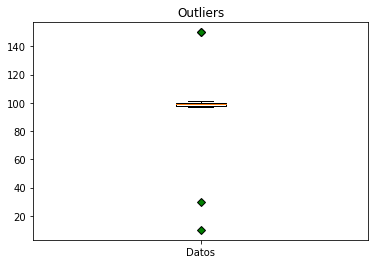

In [599]:
## se utiliza la tecnica para graficar un boxplot  y de una manera visual detectar posibles outliers, 
#la figura muestra en verde los datos atipicos
Datos = Hepatitis.datos_Outliers
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Outliers')
ax.boxplot(Datos, flierprops=green_diamond, labels=["Datos"])

C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='datos_Outliers'>

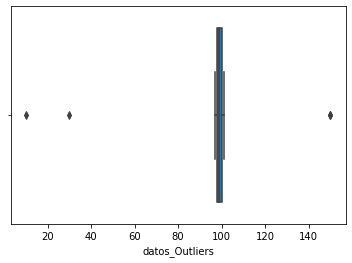

In [600]:
## se utiliza otro ejemplo de graficar un boxplot  y de una manera visual detectar posibles outliers, 
#la figura muestra en verde los datos atipicos
sns.boxplot(Hepatitis.datos_Outliers)

In [601]:
# se utiliza otra tecnica con Zscore para darle un score a los valores y poder determinar
#cuales estan fuera por 3 desviaciones standard para arriba o para abajo de la media.
z = np.abs(stats.zscore(Hepatitis.datos_Outliers))
print(z)

[4.74835402 0.06206999 0.06206999 0.03043817 0.03043817 0.15457814
 0.21545447 0.12294632 0.12294632 0.06206999 0.06206999 0.03043817
 0.03043817 0.15457814 0.21545447 0.12294632 0.12294632 0.06206999
 0.06206999 0.03043817 0.03043817 0.15457814 0.21545447 0.12294632
 0.12294632 0.06206999 0.06206999 0.03043817 0.03043817 0.15457814
 0.21545447 0.12294632 4.74835402 6.35262446 0.12294632 0.06206999
 0.06206999 0.03043817 0.03043817 0.15457814 0.21545447 0.12294632
 0.12294632 0.06206999 0.06206999 0.03043817 0.03043817 0.15457814
 0.21545447 0.12294632 0.12294632 0.06206999 0.06206999 0.03043817
 0.03043817 0.15457814 0.21545447 0.12294632 0.12294632 0.06206999
 0.06206999 0.03043817 0.03043817 0.15457814 0.21545447 0.12294632
 0.12294632 0.06206999 0.06206999 0.03043817 0.03043817 0.15457814
 0.21545447 0.12294632 0.12294632 0.06206999 0.06206999 0.03043817
 0.03043817 0.15457814 0.21545447 0.12294632 8.20278753 0.03043817
 0.15457814 0.21545447 0.12294632 0.12294632 0.06206999 0.0620

In [602]:
# se muestras las posicion en el set de datos donde estan estos valores que estan fuera de la media 
print(np.where(z > 3))
Outliers= np.where(z > 3)

(array([ 0, 32, 33, 82], dtype=int64),)


In [603]:
# se remueven los outliers para volver a graficar los datos 
Datos_limpios = Hepatitis.datos_Outliers.drop(Hepatitis.datos_Outliers.index[Outliers])

C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='datos_Outliers'>

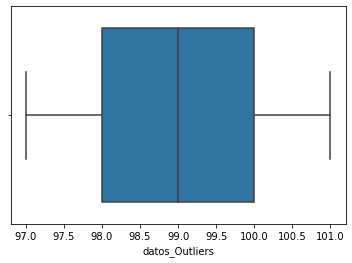

In [604]:
# Grafico boxplot con outliers eliminados
sns.boxplot(Datos_limpios)

In [605]:
print(Datos_limpios)

1       98
2       98
3       99
4       99
5       97
      ... 
150     99
151     99
152     97
153    101
154    100
Name: datos_Outliers, Length: 151, dtype: int64
